## If you are running container on machine with GPU 

In [ ]:
!pip install --no-cache-dir http://download.pytorch.org/whl/cu80/torch-0.1.12.post2-cp27-none-linux_x86_64.whl

## Otherwise install CPU version

In [1]:
! pip install --no-cache-dir http://download.pytorch.org/whl/cu75/torch-0.1.12.post2-cp27-none-linux_x86_64.whl

    100% |################################| 348.8MB 7.0MB/s ta 0:00:011B/s eta 0:00:03###### | 342.8MB 7.5MB/s eta 0:00:01


## Install torchvision & download CRNN model ( for both CPU & GPU)

In [3]:
!pip install --upgrade torchvision
!wget https://www.dropbox.com/s/l0vo83hmvv2aipn/crnn.pth

--2017-11-27 01:58:07--  https://www.dropbox.com/s/l0vo83hmvv2aipn/crnn.pth
Resolving www.dropbox.com... 2620:100:601a:1::a27d:701, 162.125.2.1
Connecting to www.dropbox.com|2620:100:601a:1::a27d:701|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/h8zc4WxaZvUNJgE5pKNzsHr7tAg3tlwYoVCTnAi09PMcB7BSP71OUc6bCh2C1trk/file [following]
--2017-11-27 01:58:08--  https://dl.dropboxusercontent.com/content_link/h8zc4WxaZvUNJgE5pKNzsHr7tAg3tlwYoVCTnAi09PMcB7BSP71OUc6bCh2C1trk/file
Resolving dl.dropboxusercontent.com... 2620:100:601a:6::a27d:706, 162.125.2.6
Connecting to dl.dropboxusercontent.com|2620:100:601a:6::a27d:706|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33351680 (32M) [text/plain]
Saving to: 'crnn.pth'

100%[======================================>] 33,351,680  17.4MB/s   in 1.8s   

2017-11-27 01:58:12 (17.4 MB/s) - 'crnn.pth' saved [33351680/33351680]



In [1]:
import sys
sys.path.append('../../')

In [4]:
import dvalib.crnn.utils as utils 
import dvalib.crnn.dataset as dataset
import torch
from torch.autograd import Variable
from PIL import Image
import dvalib.crnn.models.crnn as crnn
import glob
from IPython.core import display


model_path = 'crnn.pth'
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
model = crnn.CRNN(32, 1, 37, 256, 1)
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))
converter = utils.strLabelConverter(alphabet)
transformer = dataset.resizeNormalize((100, 32))

loading pretrained model from crnn.pth


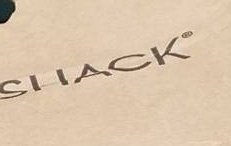

d-----r--r--c----v-----d-- => drrcvd              


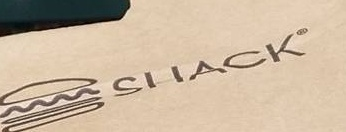

s---e----e-r-i-a-c--k--s-- => seeriacks           


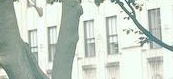

p------f-----g--e--------- => pfge                


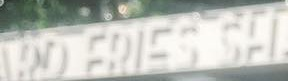

p----t-e--r--e--a--t-l---- => ptereatl            


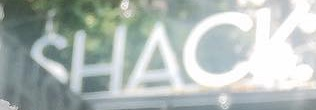

s-----h-----a---c---kk---- => shack               


f--o--o-d---ss-c-ra--p--s- => foodscraps          


e--x--e-r--e--g--a--t--e-- => exeregate           


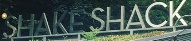

ss-h-a--k-e-ssh--aa-c--k-- => shakeshack          


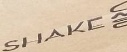

s----p----a---k---e----s-- => spakes              


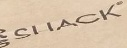

s--s---n----a---c---k----- => ssnack              


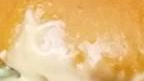

p-------a----------------- => pa                  


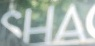

s-------h--------a-------- => sha                 


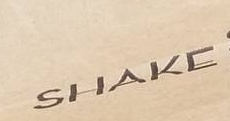

s-------t----a---k---e---- => stake               


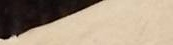

i--------------------n---- => in                  


a-------------k---e--s-s-- => akess               


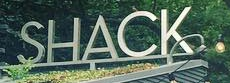

ss----h---a---c---k------- => shack               


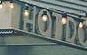

t------h----o-------d--s-- => thods               


s---------------e-n-e--s-- => senes               


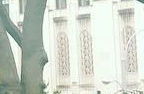

v---------d---t---e---d--- => vdted               


In [5]:
for img_path in glob.glob('boxes/*.jpg'):
    image = Image.open(img_path).convert('L')
    image = transformer(image)
    image = image.view(1, *image.size())
    image = Variable(image)
    model.eval()
    preds = model(image)
    _, preds = preds.max(2)
    preds = preds.squeeze(2)
    preds = preds.transpose(1, 0).contiguous().view(-1)
    preds_size = Variable(torch.IntTensor([preds.size(0)]))
    raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
    sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
    display.display(display.Image(img_path))
    print('%-20s => %-20s' % (raw_pred, sim_pred))